In [1]:
import rebound
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np


In [ ]:
sim = rebound.Simulation()
sim.G = 4*np.pi**2
sim.units = ['AU', 'yr', 'Msun']

sim.add("Sun")
sim.add(m=6.537671975029727e-17, e=0, P=1)


sim.move_to_com()
sim.save("error_sim.bin")


In [2]:
sim = rebound.Simulation.from_file("error_sim.bin")
print(sim.calculate_orbits()[0])

<rebound.Orbit instance, a=0.9999874091393868 e=0.0 inc=0.0 Omega=0.0 omega=0.0 f=0.0>


In [1]:
sim.t = 0
sim.move_to_com()
np.zeros
Noutputs = 100
years = 1000000
orbits = np.zeros((3,Noutputs))
times = np.linspace(0.,years, Noutputs)
for i,time in enumerate(times):
    sim.integrate(time)
    #print(sim.calculate_orbits()[0])
    print(sim.particles[0].x,sim.particles[0].y,sim.particles[0].z)
    orbits[0][i] = sim.particles[1].orbit.P
    orbits[1][i] = sim.particles[1].orbit.e
    orbits[2][i] = sim.particles[1].orbit.a
    

NameError: name 'sim' is not defined

<IPython.core.display.Javascript object>


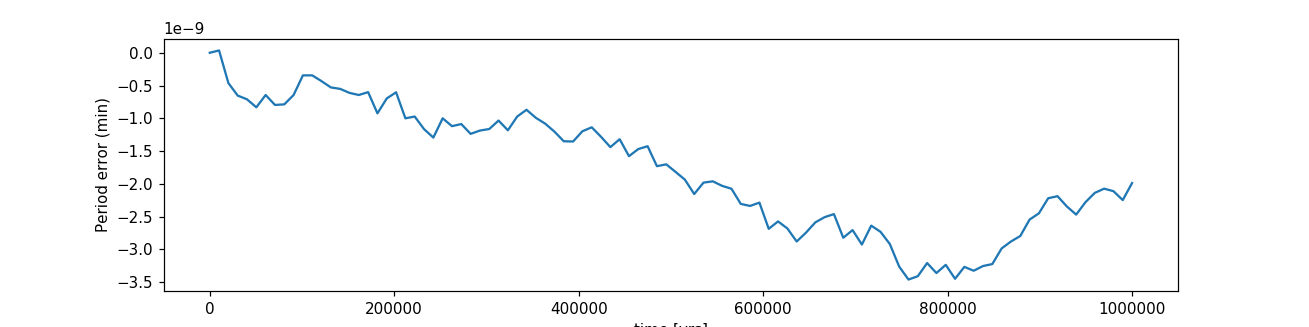

In [4]:
%matplotlib notebook
fig = plt.figure(figsize=(12,3))
ax = plt.subplot(111)
ax.set_xlabel("time [yrs]")
ax.set_ylabel("Period error (min)")

plt.plot(times, (orbits[0]-1.0)*24*365);


<IPython.core.display.Javascript object>


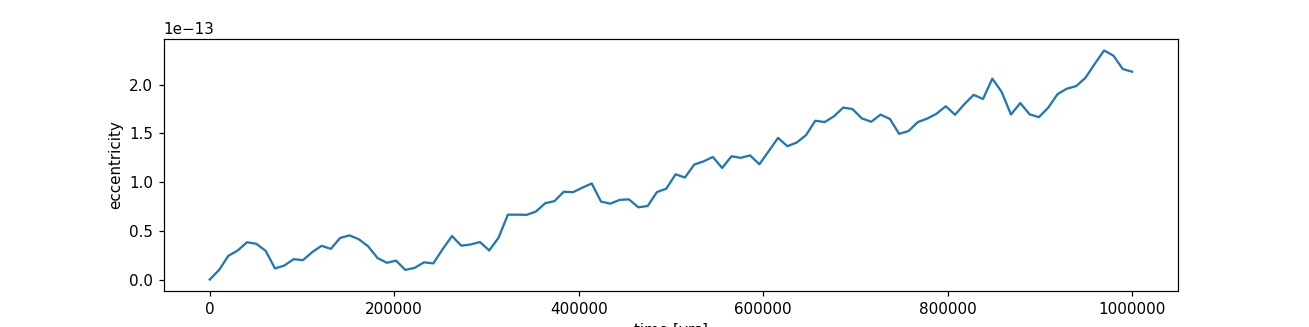

In [6]:
%matplotlib notebook
fig = plt.figure(figsize=(12,3))
ax = plt.subplot(111)
ax.set_xlabel("time [yrs]")
ax.set_ylabel("eccentricity")

plt.plot(times, orbits[1]);


<IPython.core.display.Javascript object>


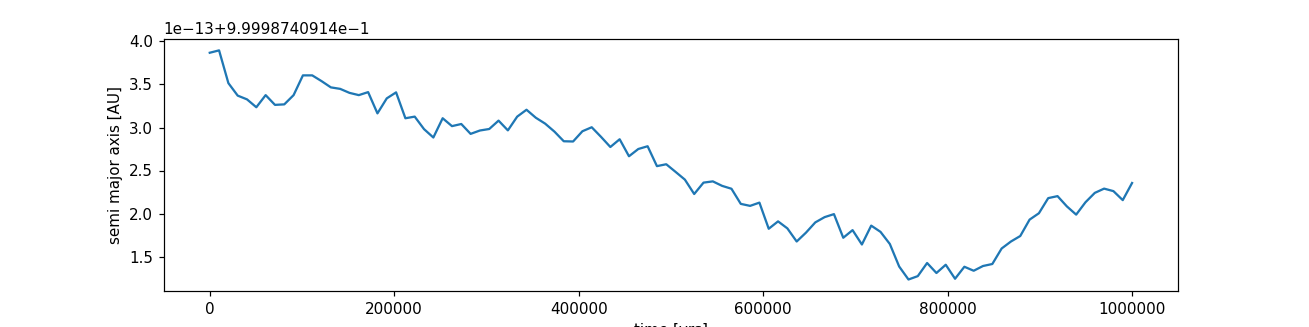

In [7]:
%matplotlib notebook
fig = plt.figure(figsize=(12,3))
ax = plt.subplot(111)
ax.set_xlabel("time [yrs]")
ax.set_ylabel("semi major axis [AU]")

plt.plot(times, orbits[2]);